In [ ]:
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [3]:
PATH = '../data/raw/medquad.csv'

df = pd.read_csv(PATH)

In [4]:
df.head()

,question,answer,source,focus_area
0,What is (are) Glaucoma ?,Glaucoma is a group of diseases that can damag...,NIHSeniorHealth,Glaucoma
1,What causes Glaucoma ?,"Nearly 2.7 million people have glaucoma, a lea...",NIHSeniorHealth,Glaucoma
2,What are the symptoms of Glaucoma ?,Symptoms of Glaucoma Glaucoma can develop in ...,NIHSeniorHealth,Glaucoma
3,What are the treatments for Glaucoma ?,"Although open-angle glaucoma cannot be cured, ...",NIHSeniorHealth,Glaucoma
4,What is (are) Glaucoma ?,Glaucoma is a group of diseases that can damag...,NIHSeniorHealth,Glaucoma


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16412 entries, 0 to 16411
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   question    16412 non-null  object
 1   answer      16407 non-null  object
 2   source      16412 non-null  object
 3   focus_area  16398 non-null  object
dtypes: object(4)
memory usage: 513.0+ KB


In [6]:
# drop na values
print(f'Shape of df before dropping: {df.shape}')
df = df.dropna()
print(f'Shape of df after dropping: {df.shape}')

Shape of df before dropping: (16412, 4)
Shape of df after dropping: (16393, 4)


## Explore questions in each focus area

### Number of questions per focus area

In [7]:
counts_per_focus_area = df\
    .groupby('focus_area')\
    .count()[['question']]\
    .reset_index()\
    .sort_values(by='question', ascending=False)

In [8]:
counts_per_focus_area.head()

,focus_area,question
577,Breast Cancer,53
3456,Prostate Cancer,43
3951,Stroke,35
3786,Skin Cancer,34
217,Alzheimer's Disease,30


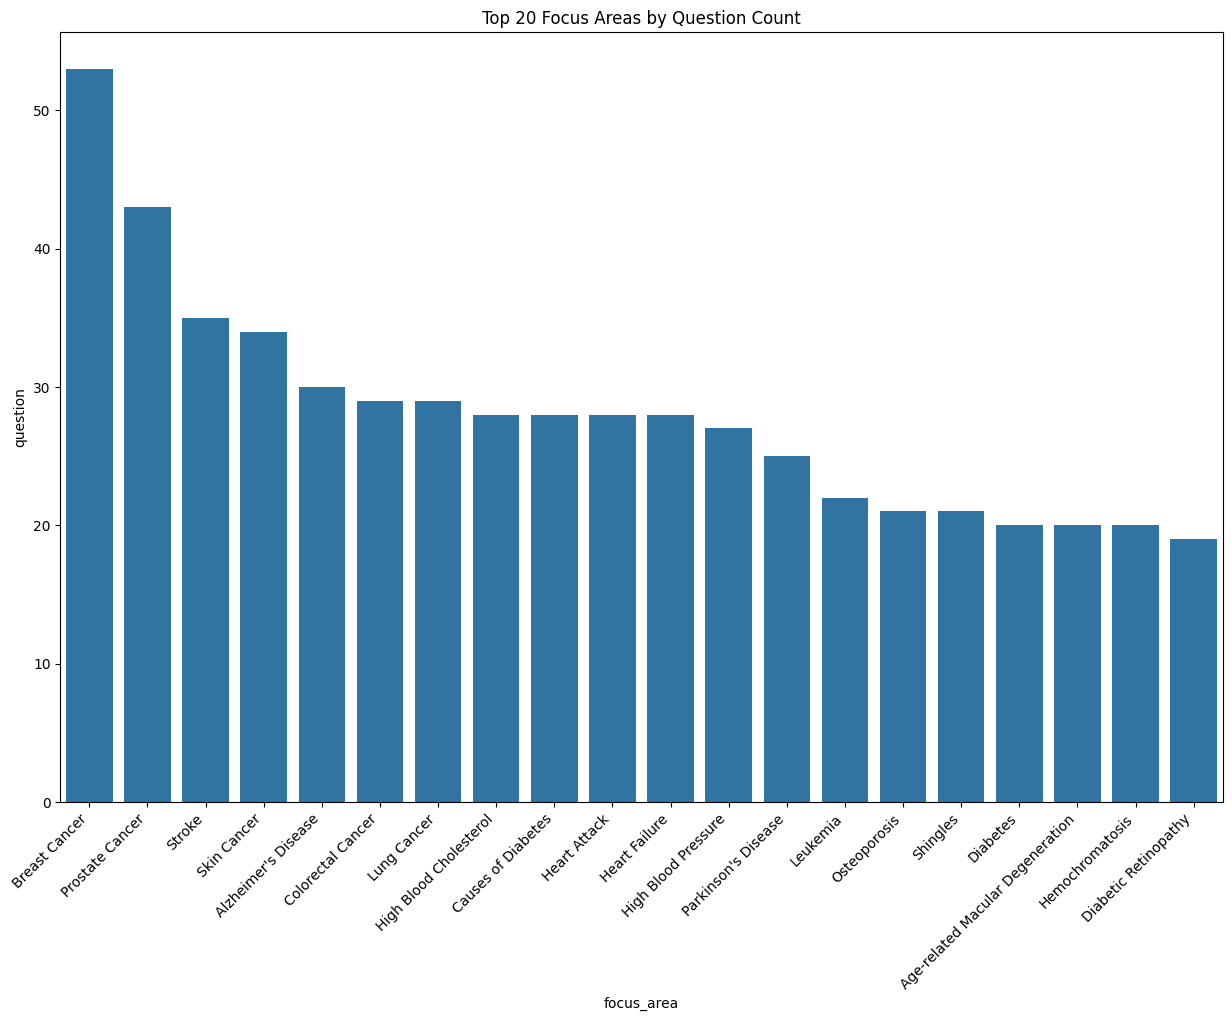

In [9]:
plt.figure(figsize=(15, 10))

sns.barplot(
    data=counts_per_focus_area.head(20), # take only top 20 because got a lot of focus areas
    x="focus_area",
    y="question",
    
)

plt.xticks(rotation=45, ha="right")
plt.title("Top 20 Focus Areas by Question Count")
plt.show()

In [10]:
# check those with only 1 question answer pair
one_question = counts_per_focus_area[counts_per_focus_area['question'] == 1]
one_question.head()

,focus_area,question
4,15q13.3 microduplication syndrome,1
12,18 Hydroxylase deficiency,1
14,19p13.12 microdeletion syndrome,1
18,1q44 microdeletion syndrome,1
2116,Infant and Newborn Development,1


In [11]:
one_question.shape

(2332, 2)

2332 focus areas have only one question. It could affect the qualitative performance of the finetuned models later on if we ask them questions related to these focus areas.

### Average question and answer length by focus area

In [12]:
df.head()

,question,answer,source,focus_area
0,What is (are) Glaucoma ?,Glaucoma is a group of diseases that can damag...,NIHSeniorHealth,Glaucoma
1,What causes Glaucoma ?,"Nearly 2.7 million people have glaucoma, a lea...",NIHSeniorHealth,Glaucoma
2,What are the symptoms of Glaucoma ?,Symptoms of Glaucoma Glaucoma can develop in ...,NIHSeniorHealth,Glaucoma
3,What are the treatments for Glaucoma ?,"Although open-angle glaucoma cannot be cured, ...",NIHSeniorHealth,Glaucoma
4,What is (are) Glaucoma ?,Glaucoma is a group of diseases that can damag...,NIHSeniorHealth,Glaucoma


In [13]:
df['question_length'] = df['question'].apply(lambda x: len(x.split()))

In [14]:
avg_len = df.groupby("focus_area")["question_length"]\
    .mean()\
    .reset_index()\
    .sort_values(by='question_length', ascending=False)

avg_len.head(10)

,focus_area,question_length
2872,National Hormone and Pituitary Program (NHPP):...,22.750
218,Am I at Risk for Type 2 Diabetes? Taking Steps...,22.125
2058,I Can Lower My Risk for Type 2 Diabetes: A Gui...,19.500
3927,Stargardt macular degeneration absent or hypop...,19.000
3578,"Renal tubulopathy, diabetes mellitus, and cere...",19.000
4151,"Trigonobrachycephaly, bulbous bifid nose, micr...",18.000
4349,What I need to know about Preparing for Pregna...,17.500
2744,Monogenic Forms of Diabetes: Neonatal Diabetes...,17.250
3982,"Symphalangism, distal, with microdontia, denta...",17.000
227,"Amino aciduria with mental deficiency, dwarfis...",17.000


Questions are not too long

In [15]:
df['answer_length'] = df['answer'].apply(lambda x: len(x.split()))

In [16]:
avg_len_ans = df.groupby("focus_area")["answer_length"]\
    .mean()\
    .reset_index()\
    .sort_values(by='answer_length', ascending=False)

avg_len_ans.head(10)

,focus_area,answer_length
819,Childhood Vascular Tumors,1510.500000
2232,Kaposi Sarcoma,1351.250000
1042,Coronary Heart Disease Risk Factors,1271.333333
1348,Ehrlichiosis,1235.500000
3636,Rocky Mountain Spotted Fever (RMSF),1202.000000
248,Anaplasmosis,1128.000000
818,Childhood Soft Tissue Sarcoma,1052.625000
817,Childhood Rhabdomyosarcoma,1009.285714
2740,Monitor Your Diabetes,1006.000000
3766,Sickle Cell Disease,1000.714286


Answers contain a lot more words

### Distribution of answer length

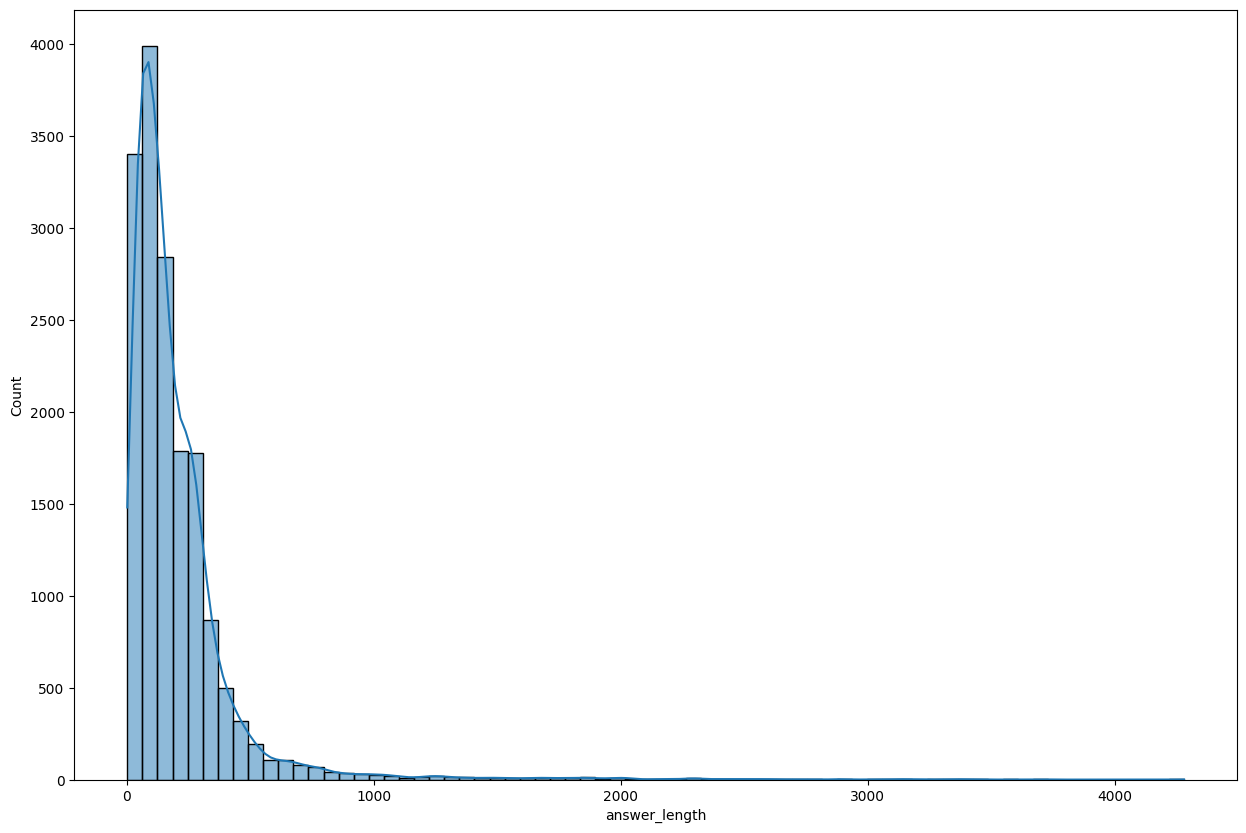

In [17]:
plt.figure(figsize=(15, 10))
sns.histplot(
    data=df,
    x='answer_length',
    kde=True,
    bins=70
)
plt.show()

### Diversity of sources for each focus area

In [18]:
diversity_per_focus_area = df.groupby('focus_area')[['source']]\
    .nunique()\
    .sort_values(by='source', ascending=False)

diversity_per_focus_area.head()

,source
focus_area,
Hemochromatosis,4
Stroke,4
Heart Failure,3
Asthma,3
Cushing's Syndrome,3


In [19]:
diversity_per_focus_area.shape

(5125, 1)

In [20]:
# number of focus areas with only 1 source
diversity_per_focus_area[diversity_per_focus_area['source'] == 1].shape

(4814, 1)

Most focus areas have only 1 source.

### Diversity of focus areas for each source

In [21]:
# how many topics each source writes about
source_diversity = df.groupby('source')[['focus_area']]\
    .nunique()\
    .sort_values(by='focus_area', ascending=False)

source_diversity.head()

,focus_area
source,
GARD,2684
GHR,1086
MPlusHealthTopics,981
NINDS,272
NIDDK,148


In [22]:
source_diversity.tail()

,focus_area
source,
NIDDK,148
CancerGov,98
NHLBI,88
CDC,56
NIHSeniorHealth,48


Each source writes about a variety of topics

### Most frequent words by topic

In [23]:
def top_10_words(series):
    # join all answers in the same focus area
    all_text = " ".join(series).lower()
    # split into words
    words = all_text.split()
    # count frequency
    counter = Counter(words)
    # get top 10
    return counter.most_common(10)

In [24]:
top_words_per_focus_area = (
    df.groupby('focus_area')['answer']
      .apply(top_10_words)
      .reset_index(name='top_words')
)

In [49]:
d = {}

for _, row in top_words_per_focus_area.iterrows():
    top_words = row['top_words']
    for w, freq in top_words:
        d[w] = d.get(w, 0) + 1

lst = sorted(list(d.items()), key = lambda x: x[1], reverse = True)

In [51]:
lst[:10]

[('the', 4880),
 ('of', 4784),
 ('and', 4694),
 ('in', 4146),
 ('a', 4127),
 ('is', 3992),
 ('-', 2513),
 ('to', 2190),
 ('or', 1245),
 ('information', 1116)]

Most frequent words used in each article are stopwords